# BDAT1004 Data Programming Problem Set 3

# Question 1

In [4]:
import numpy as np
import pandas as pd
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user','|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## Discover what is the mean age per occupation

In [8]:
mean = users.groupby('occupation').age.mean()
print(mean)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


## Discover the Male ratio per occupation and sort it from the most to the least

In [15]:
users['countofm'] = users['gender'].apply(lambda a: True if a == 'M' else False)
(users.groupby('occupation').countofm.sum()/users.groupby('occupation').gender.count()).sort_values(ascending = False)
#countofm -> male count

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

## For each occupation, calculate the minimum and maximum ages

In [16]:
users.groupby('occupation').age.min()

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64

In [17]:
users.groupby('occupation').age.max()

occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64

## For each combination of occupation and sex, calculate the mean age

In [25]:
users.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

##  For each occupation present the percentage of women and men

In [27]:
countofg = users.groupby('occupation').gender.count()
(users.groupby('occupation').gender.value_counts()/countofg)*100
#Multiplying with 100 to display value in Percentage
#countofg -> gender count

occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
educator       M          72.631579
               F          27.368421
engineer       M          97.014925
               F           2.985075
entertainment  M          88.888889
               F          11.111111
executive      M          90.625000
               F           9.375000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         M          83.333333
               F          16.666667
librarian      F          56.862745
               M          43.137255
marketing      M          61.538462
               F          38.461538
none           M          55.555556
               F          44.444444
other          M          65.714286
               F          34.285714
progra

# Question 2

In [29]:
import numpy as np
import pandas as pd
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


##  Select only the Goal column

In [33]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

 ## How many team participated in the Euro2012?

In [36]:
euro12['Team'].count()

16

## What is the number of columns in the dataset?

In [38]:
len(euro12.columns)

35

## View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [50]:
discipline = euro12.filter(['Team', 'Yellow Cards', 'Red Cards'])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


##  Sort the teams by Red Cards, then to Yellow Cards

In [60]:
rc = euro12.filter(['Team', 'Red Cards'])
rc.sort_values(by = 'Red Cards', ascending = False)

,Team,Red Cards
6,Greece,1
9,Poland,1
11,Republic of Ireland,1
0,Croatia,0
1,Czech Republic,0
2,Denmark,0
3,England,0
4,France,0
5,Germany,0
7,Italy,0


In [61]:
yc = euro12.filter(['Team', 'Yellow Cards'])
yc.sort_values(by = 'Yellow Cards', ascending = False)

,Team,Yellow Cards
7,Italy,16
10,Portugal,12
13,Spain,11
0,Croatia,9
6,Greece,9
1,Czech Republic,7
9,Poland,7
14,Sweden,7
4,France,6
11,Republic of Ireland,6


##  Calculate the mean Yellow Cards given per Team

In [63]:
(euro12.groupby('Team')['Yellow Cards']).mean()

Team
Croatia                 9
Czech Republic          7
Denmark                 4
England                 5
France                  6
Germany                 4
Greece                  9
Italy                  16
Netherlands             5
Poland                  7
Portugal               12
Republic of Ireland     6
Russia                  6
Spain                  11
Sweden                  7
Ukraine                 5
Name: Yellow Cards, dtype: int64

## Filter teams that scored more than 6 goals

In [65]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


## Select the teams that start with G

In [64]:
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


## Select the first 7 columns

In [70]:
euro12.iloc[:,0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


## Select all columns except the last 3

In [72]:
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


## Present only the Shooting Accuracy from England, Italy and Russia

In [76]:
accuracy = ['England','Italy','Russia']
euro12[euro12.Team.isin(accuracy)][['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

## Import the necessary libraries

In [77]:
import numpy as np
import pandas as pd

## Create 3 differents Series, each of length 100, as follows:
### • The first a random number from 1 to 4
### • The second a random number from 1 to 3
### • The third a random number from 10,000 to 30,000

In [81]:
s1 = pd.Series(np.linspace(1,4,100))
s2 = pd.Series(np.linspace(1,3,100))
s3 = pd.Series(np.linspace(10000,30000,100))

## Create a DataFrame by joining the Series by column
### Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [83]:
dict = {'bedrs':s1,'bathrs':s2,'price_sqr_meter':s3}
df = pd.DataFrame(dict)
df

,bedrs,bathrs,price_sqr_meter
0,1.000000,1.000000,10000.000000
1,1.030303,1.020202,10202.020202
2,1.060606,1.040404,10404.040404
3,1.090909,1.060606,10606.060606
4,1.121212,1.080808,10808.080808
...,...,...,...
95,3.878788,2.919192,29191.919192
96,3.909091,2.939394,29393.939394
97,3.939394,2.959596,29595.959596
98,3.969697,2.979798,29797.979798


## Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [87]:
df2 = pd.DataFrame((s1.append(s2, ignore_index = True)).append(s3, ignore_index = True), columns = ['bigcolumn'])
df2

,bigcolumn
0,1.000000
1,1.030303
2,1.060606
3,1.090909
4,1.121212
...,...
295,29191.919192
296,29393.939394
297,29595.959596
298,29797.979798


## Ops it seems it is going only until index 99. Is it true?
## Reindex the DataFrame so it goes from 0 to 299

No, it is False. Since we have appended series 2 and 3 to Series 1 it goes until index 299 hence there is no need for reindexing

# Question 5

In [ ]:
import numpy as np
import pandas as pd

## Import the dataset from this address.
## Assign it to a variable called chipo.
## See the first 10 entries

In [178]:
chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv','\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


## What is the number of columns in the dataset?

In [174]:
shape = chipo.shape
print('Number of Columns = ', shape[1])

Number of Columns =  5


## Print the name of all the columns.

In [176]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

##  How is the dataset indexed?

In [179]:
chipo.head(-1)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25


Data Index starts at 0 and ends at 4620

## Which was the most-ordered item?

In [180]:
chipo['item_name'][chipo['quantity']==chipo['quantity'].max()]

3598    Chips and Fresh Tomato Salsa
Name: item_name, dtype: object

## For the most-ordered item, how many items were ordered?

In [181]:
chipo['quantity'][chipo['quantity']==chipo['quantity'].max()]

3598    15
Name: quantity, dtype: int64

## What was the most ordered item in the choice_description column?

In [185]:
df = [chipo.groupby('choice_description').quantity.max()]
df = pd.DataFrame(df)
df =df.T
df[df['quantity'] == df['quantity'].max()]

,quantity
choice_description,
[Coke],4
"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Lettuce]]",4
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",4
[Sprite],4


## How many items were orderd in total?

In [186]:
Total = chipo['quantity'].sum()
Total

4972

## How many orders were made in the period?

In [188]:
chipo['order_id'].value_counts().sum()

4622

## How many different items are sold?

In [189]:
df1 = pd.DataFrame(chipo['item_name'].value_counts())
df1

,item_name
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301
Chips,211
Steak Bowl,211
Bottled Water,162
Chicken Soft Tacos,115
Chicken Salad Bowl,110


In [190]:
len(df1)

50

# Question 6

## Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\SSK\Downloads\us-marriages-divorces-1867-2014.csv')
df.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


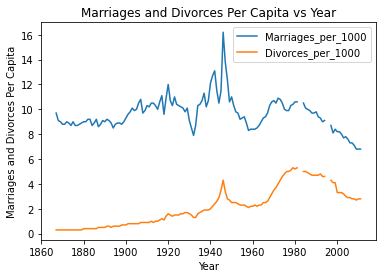

In [99]:
columns = pd.DataFrame([df['Marriages_per_1000'],df['Divorces_per_1000']]).T
for column in columns.columns:
    plt.plot(df['Year'],columns[column],label = column)
plt.title("Marriages and Divorces Per Capita vs Year")    
plt.xlabel('Year')
plt.ylabel("Marriages and Divorces Per Capita")
plt.legend()
plt.show()   

# Question 7
## Create a vertical bar chart comparing the number of marriages and divorces percapita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(r'C:\Users\SSK\Downloads\us-marriages-divorces-1867-2014.csv')
df.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


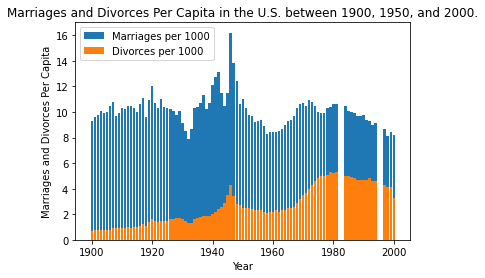

In [112]:
df2 = df.loc[(df['Year'] >= 1900) & (df['Year'] <=  2000)]
df2 = df2.drop(['Marriages','Divorces','Population'], axis=1)
df3 = df2.drop(['Year'], axis=1)

for column in df3.columns:
    plt.bar(df2['Year'],df2[column])
plt.legend(['Marriages per 1000','Divorces per 1000'])
plt.title('Marriages and Divorces Per Capita in the U.S. between 1900, 1950, and 2000.')
plt.xlabel('Year')
plt.ylabel("Marriages and Divorces Per Capita")
plt.show()

# Question 8
## Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

actor = pd.read_csv(r'C:\Users\SSK\Downloads\actor_kill_counts.csv')
actor.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


In [115]:
data = actor.sort_values(by = 'Count', ascending = True)
data

,Actor,Count
9,Wesley Snipes,193
3,Clive Owen,194
5,Jet Li,201
6,Nicolas Cage,204
2,Clint Eastwood,207
8,Tomisaburo Wakayama,226
4,Dolph Lundgren,239
7,Sylvester Stallone,267
1,Chow Yun-Fat,295
0,Arnold Schwarzenegger,369


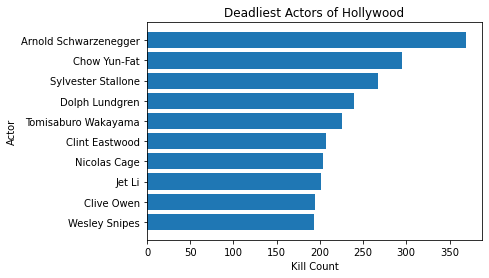

In [119]:
plt.title('Deadliest Actors of Hollywood')
plt.ylabel("Actor")
plt.xlabel("Kill Count")
plt.barh(data['Actor'],data['Count'])
plt.show()

# Question 9
## Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

## Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [126]:
import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\SSK\Downloads\roman-emperor-reigns.csv')
data.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [127]:
type(data['Length_of_Reign'][0])
assassinated = data[data['Cause_of_Death'] == 'Assassinated']
assassinated

,Emperor,Length_of_Reign,Cause_of_Death
2,Caligula,4.83,Assassinated
5,Galba,0.58,Assassinated
7,Vitellius,0.67,Assassinated
10,Domitian,15.00,Assassinated
17,Commodus,15.00,Assassinated
18,Pertinax,0.25,Assassinated
21,Caracalla,19.00,Assassinated
22,Geta,3.00,Assassinated
24,Elagabalus,3.75,Assassinated
25,Severus Alexander,13.00,Assassinated


In [137]:
assassinated = data[data['Cause_of_Death'] == 'Assassinated']
assassinated



chart = assassinated['Length_of_Reign']
list = [i for i in chart]
labels = assassinated['Emperor']

fig = {
    "data": [
        {
            "values" : list,
            "labels" : labels,
            "domain": {"x": [0, 0.5]},
            "hoverinfo":"label+percent+name",
            "type": "pie"
            
        },],
    "layout": {
        "title":"Reign of Assassinated Roman Emperors",
        "annotations": [
            { "font": { "size": 15},
              "showarrow": False,
              "text": "Assassinated Roman Emperors ",
                "x": 0.5,
                "y": 1
            },
        ]
    }
    
}

iplot(fig)

# Question 10
## Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
## Don't forget to label your axes!
## Color each dot according to its year

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
dat = pd.read_csv(r'C:\Users\SSK\Downloads\arcade-revenue-vs-cs-doctorates.csv')
dat.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


In [168]:
dat = dat[(dat['Year']>= 2000) & (dat['Year']<= 2009)]
dat

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611
